In [4]:
import basedosdados as bd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [5]:
df = bd.read_table(dataset_id='world_fifa_worldcup',
table_id='matches',
billing_project_id="dados-bd-359914")

Downloading: 100%|███████████████████████████████████████████████████████████████| 900/900 [00:00<00:00, 1131.72rows/s]


In [6]:
df_brazil = df[((df['team_a_name'] == 'Brazil')|(df['team_b_name'] == 'Brazil')) & (df['stage_name'] == 'group stage') ]

In [7]:
df_2= df_brazil[['year','score','team_a_name','team_b_name','team_a_win','team_b_win','draw','match_date','team_a_score','team_b_score','team_a_code','team_b_id_code','city_name']]
df_2

,year,score,team_a_name,team_b_name,team_a_win,team_b_win,draw,match_date,team_a_score,team_b_score,team_a_code,team_b_id_code,city_name
2,1930,2–1,Yugoslavia,Brazil,1,0,0,1930-07-14,2,1,YUG,BRA,Montevideo
11,1930,4–0,Brazil,Bolivia,1,0,0,1930-07-20,4,0,BRA,BOL,Montevideo
53,1950,4–0,Brazil,Mexico,1,0,0,1950-06-24,4,0,BRA,MEX,Rio de Janeiro
58,1950,2–2,Brazil,Switzerland,0,0,1,1950-06-28,2,2,BRA,CHE,São Paulo
63,1950,2–0,Brazil,Yugoslavia,1,0,0,1950-07-01,2,0,BRA,YUG,Rio de Janeiro
75,1954,5–0,Brazil,Mexico,1,0,0,1954-06-16,5,0,BRA,MEX,Geneva
84,1954,1–1,Brazil,Yugoslavia,0,0,1,1954-06-19,1,1,BRA,YUG,Lausanne
107,1958,3–0,Brazil,Austria,1,0,0,1958-06-08,3,0,BRA,AUT,Uddevalla
114,1958,0–0,Brazil,England,0,0,1,1958-06-11,0,0,BRA,ENG,Gothenburg
123,1958,2–0,Brazil,Soviet Union,1,0,0,1958-06-15,2,0,BRA,SUN,Gothenburg


In [8]:
df_3 = df_2.groupby('year')['score','team_a_name','team_b_name','team_a_win','team_b_win', 'draw','match_date','team_a_score','team_b_score','team_a_code','team_b_id_code','city_name'].agg(['first']).reset_index()

In [9]:
df_3.columns = df_3.columns.droplevel(1)
df_3 

,year,score,team_a_name,team_b_name,team_a_win,team_b_win,draw,match_date,team_a_score,team_b_score,team_a_code,team_b_id_code,city_name
0,1930,2–1,Yugoslavia,Brazil,1,0,0,1930-07-14,2,1,YUG,BRA,Montevideo
1,1950,4–0,Brazil,Mexico,1,0,0,1950-06-24,4,0,BRA,MEX,Rio de Janeiro
2,1954,5–0,Brazil,Mexico,1,0,0,1954-06-16,5,0,BRA,MEX,Geneva
3,1958,3–0,Brazil,Austria,1,0,0,1958-06-08,3,0,BRA,AUT,Uddevalla
4,1962,2–0,Brazil,Mexico,1,0,0,1962-05-30,2,0,BRA,MEX,Viña del Mar
5,1966,2–0,Brazil,Bulgaria,1,0,0,1966-07-12,2,0,BRA,BGR,Liverpool
6,1970,4–1,Brazil,Czechoslovakia,1,0,0,1970-06-03,4,1,BRA,CSK,Guadalajara
7,1974,0–0,Brazil,Yugoslavia,0,0,1,1974-06-13,0,0,BRA,YUG,Frankfurt
8,1978,1–1,Brazil,Sweden,0,0,1,1978-06-03,1,1,BRA,SWE,Mar del Plata
9,1982,2–1,Brazil,Soviet Union,1,0,0,1982-06-14,2,1,BRA,SUN,Seville


In [10]:
def lab(df_3):
    if ((df_3['team_a_name'] == 'Brazil') & (df_3['team_a_win'] == 1)):
        return "vitória"
    elif ((df_3['team_b_name'] == 'Brazil') & (df_3['team_b_win'] == 1)):
        return "vitória"
    elif ((df_3['team_a_name'] == 'Brazil') & (df_3['team_b_win'] == 1)):
        return "derrota"
    elif ((df_3['team_b_name'] == 'Brazil') & (df_3['team_a_win'] == 1)):
        return "derrota"
    elif  (df_3['draw'] == 1):
        return "empate"

df_3["jogos"] = df_3.apply(lambda df_3:lab(df_3),axis = 1)

In [11]:
df3 = df_3[['score','year','city_name','team_a_name','team_b_name','match_date']]

In [ ]:
path = os.path.abspath(os.path.join('', ''))
path_df = os.path.join(path, 'tabela.csv')
df3.to_csv(path_df, index=False)
df3.to_csv('tabela1.csv')

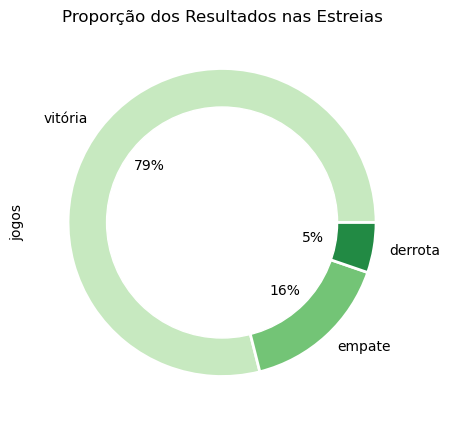

In [12]:
plt.figure(figsize=(5,5))
df_3["jogos"].value_counts().plot.pie(autopct = "%1.0f%%", # Mostrar o valor percentual
                                             colors =sns.color_palette("Greens",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})

my_circ = plt.Circle((0,0),.75,color = "white") 
plt.gca().add_artist(my_circ)

plt.title("Proporção dos Resultados nas Estreias")
plt.savefig("proporcao1.png", dpi = 600)
plt.show()
